In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import string
import requests

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
data = ('https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt')

In [5]:
data

'https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'

In [6]:
tokenizer = Tokenizer()
data = ('https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt')
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [8]:
corpus

['https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt']

In [10]:
total_words

14

In [11]:
## Creating Input sequences ##
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [12]:
## padding sequences ##
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [13]:
## Extract the last word of sequence and convert it to categorical from numerical ##
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Let’s make a sequential model now with the first layer as the word embedding layer.

And then applying bidirectional LSTM, where parameter return_sequence is marked as True so that the word generation keeps in consideration, previous and even the words coming ahead in the sequence.

A dropout layer is added to avoid overfitting, one more LSTM layer and, one more dense layer with activation as Relu, and a regularizer to avoid over-fitting again are then added.

The output layer has softmax so as to get the probability of the word to be predicted next.

In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           1400      
                                                                 
 bidirectional (Bidirectiona  (None, 13, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 14)                1414      
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                        

In [15]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 2.8907 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 75ms/step - loss: 2.8826 - accuracy: 0.2308
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 2.8750 - accuracy: 0.0769
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 2.8659 - accuracy: 0.0769
Epoch 5/100
1/1 [==============================] - 0s 70ms/step - loss: 2.8557 - accuracy: 0.0769
Epoch 6/100
1/1 [==============================] - 0s 61ms/step - loss: 2.8442 - accuracy: 0.0769
Epoch 7/100
1/1 [==============================] - 0s 67ms/step - loss: 2.8291 - accuracy: 0.0769
Epoch 8/100
1/1 [==============================] - 0s 67ms/step - loss: 2.8113 - accuracy: 0.0769
Epoch 9/100
1/1 [==============================] - 0s 65ms/step - loss: 2.7953 - accuracy: 0.0769
Epoch 10/100
1/1 [==============================] - 0s 64ms/step - loss: 2.7788 - accuracy: 0.0769
Epoch 11/100
1/1 

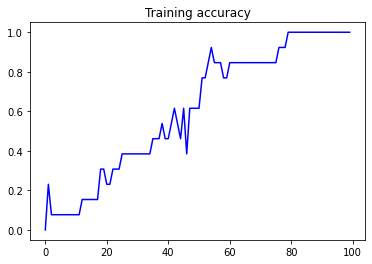

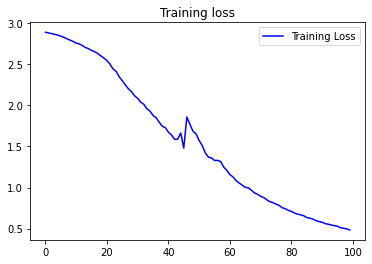

In [16]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [17]:
seed_text = " Happy Birthday Nilanjan.Many many happy returns of the day."
next_words = 100

The seed will be taken at first and tokenized and padded on the token list. Model is then used to predict with the token list as input.

Then most probable word is added to seed text and this happens for the next 100 words.

In [18]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 25ms/step
 Happy Birthday Nilanjan.Many many happy returns of the day. ocw ocw mit 6 s08 s08 s08 lecturenotes lecturenotes lecturenotes files t8 shakespeare txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt txt
